In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from scipy.io import arff
import pandas as pd

In [5]:
import numpy as np

In [6]:
import matplotlib.pyplot as plt

In [7]:
train1,train2 = arff.loadarff('../data/Epilepsy_TRAIN.arff')

In [8]:
train_df = pd.DataFrame(train1)

In [7]:
type(train2)

scipy.io.arff.arffread.MetaData

In [9]:
x_tuple = list(train_df.iloc[0,:][0][0])

In [10]:
x_tuple = np.array(x_tuple)


In [11]:
x_tuple.shape

(206,)

In [12]:
y_tuple = list(train_df.iloc[0,:][0][1])
y_tuple = np.array(y_tuple)

In [13]:
z_tuple = list(train_df.iloc[0,:][0][2])
z_tuple = np.array(z_tuple)

In [14]:
time = list(range(0,len(x_tuple)))

In [14]:
len(time)

206

**What does one random sample in its raw state look?**

''

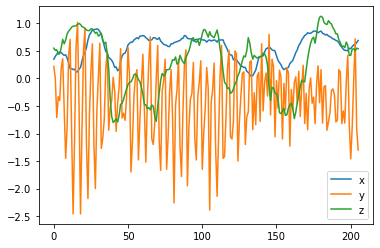

In [385]:
fig, axs = plt.subplots()
axs.plot(time,x_tuple, label='x')
axs.plot(time,y_tuple, label='y')
axs.plot(time,z_tuple, label='z')
plt.legend()
;

**in the real world the accelormeter data may come from a smart watch. what if that watch is slightly spun around the wrist? will the sample look completly different? lets look.**

In [15]:
#rotatation around z axis
def rot_matrix_z(x,y,z,theta):
    '''performs a theta degree rotation around the x axis of any three demetional point in space'''
    '''inputs:
            x : <float, y: <float>,  z: <float>
            theta: degrees
       output:
           new x y z 
           '''
    theta_rad = theta/57.2958
    rot_matrix = np.array([[np.cos(theta),-np.sin(theta), 0],
                               [np.sin(theta),np.cos(theta), 0],
                              [0, 0, 1]])
    
    
    return np.array([x,y,z])@rot_matrix

In [16]:
x = np.reshape(x_tuple,(1,-1))[0]
y = np.reshape(y_tuple,(1,-1))[0]
z = np.reshape(z_tuple,(1,-1))[0]

In [17]:
# rotate the three x,y,z arrays and save them in new x,y,z arrays
def rotate_xyz(x_array,y_array,z_array,theta):
    x_rot = np.array([])
    y_rot = np.array([])
    z_rot = np.array([])
    for i in range(len(x_array)):
        #print(x_array[i])
        new_point = rot_matrix_z(x=x_array[i],y=y_array[i],z=z_array[i],theta=theta)
        #print(new_point[0])
        #print(type(new_point[0]))
        x_rot = np.append(x_rot,new_point[0])
        #print(x_rot)
        y_rot = np.append(y_rot,new_point[1])
        z_rot = np.append(z_rot,new_point[2])
    return x_rot,y_rot,z_rot

In [18]:
x_45,y_45,z_45 = rotate_xyz(x,y,z,theta=45)

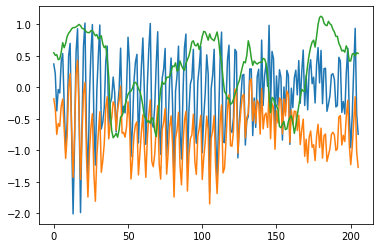

In [389]:
fig, axs = plt.subplots()
axs.plot(time,x_45, label='x')
axs.plot(time,y_45, label='y')
axs.plot(time,z_45, label='z')

**Lets plot the sample in cartesian coordinants raw next to rotated for comparision**

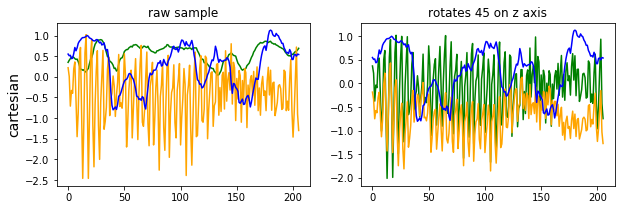

In [197]:
###ploting sample one with next to its self rotataed 45 arounf z_axis(wrist)
fig, axs = plt.subplots(1,2,figsize=(10,3))
axs[0].plot(x,color="green")
axs[0].plot(y,color='orange')
axs[0].plot(z,color='blue')

axs[1].plot(x_45,color="green")
axs[1].plot(y_45,color='orange')
axs[1].plot(z_45,color='blue')

axs[0].set_ylabel('cartesian',size=14)
axs[0].set_title('raw sample')
axs[1].set_title('rotates 45 on z axis');
    

**there are big differenced in the x and y if the acceleromter is switsed about the wrist. I speculate that changinf coordinant space and using the rho part will retain information from x, y, and z but look the same when acceleromter is spun. lets check  it out**

In [19]:
##convert to the rho component of polar coordinance
def to_rho(x,y,z):
    rho = np.sqrt(x**2 + y**2 + z**2)
    return rho
    

In [20]:
def to_theta(x,y):
    return np.arctan(y/x)

In [21]:
def to_phi(x,y,z):
    return np.arccos(z/to_rho(x,y,z))

In [26]:
## convert x,y,and z array to rho array
def cart_to_polar(x_array,y_array,z_array):
    '''input three array representing x y and z
        out put three arrays representing rho,theta, phi'''
    rho = np.array([])
    theta = np.array([])
    phi = np.array([])
    for i in range(len(x_array)):
        rho = np.append(rho,to_rho(x_array[i],y_array[i],z_array[i]))
        theta = np.append(theta, to_theta(x_array[i],y_array[i]))
        phi = np.append(phi,to_phi(x_array[i],y_array[i],z_array[i]))
    return rho,theta,phi


In [27]:
rho_raw,theta_raw,phi_raw = cart_to_polar(x,y,z)

In [28]:
rho_45,theta_45,phi_45 = cart_to_polar(x_45,y_45,z_45)

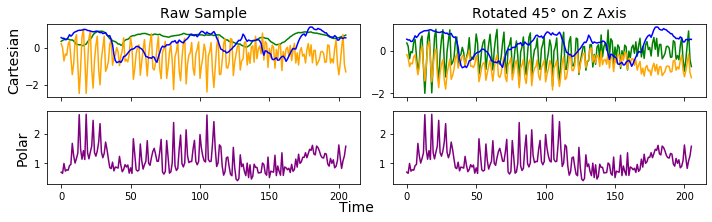

In [245]:
fig, axs = plt.subplots(2,2,figsize=(10,3),sharex=True)
axs[0][0].plot(x,color="green")
axs[0][0].plot(y,color='orange')
axs[0][0].plot(z,color='blue')

axs[0][1].plot(x_45,color="green")
axs[0][1].plot(y_45,color='orange')
axs[0][1].plot(z_45,color='blue')

degree_sign = u"\N{DEGREE SIGN}"
axs[0][0].set_ylabel('Cartesian',size=14)
axs[0][0].set_title('Raw Sample',size=14)
axs[0][1].set_title(f'Rotated 45{degree_sign} on Z Axis',size=14)

axs[1][0].plot(rho_raw,color="purple")
axs[1][1].plot(rho_45,color="purple")

axs[1][0].set_ylabel('Polar',size=14)
fig.text(0.5, -.0, 'Time', ha='center',size=14)

plt.tight_layout()

#plt.savefig('../images/compare_coords.png')

**The polar transformed sample doea not look diffent when accelerometer is rotated 45 degrees, so I will make a new dataframe that is completelt transformed into the rho part of polar coordinance.**

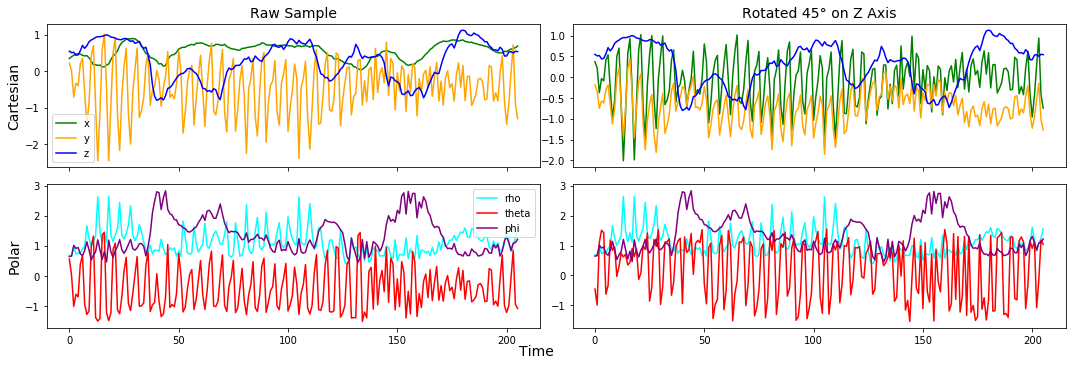

In [51]:
fig, axs = plt.subplots(2,2,figsize=(15,5),sharex=True)
axs[0][0].plot(x,color="green",label='x')
axs[0][0].plot(y,color='orange',label='y')
axs[0][0].plot(z,color='blue',label='z')
axs[0][0].legend()

axs[0][1].plot(x_45,color="green")
axs[0][1].plot(y_45,color='orange')
axs[0][1].plot(z_45,color='blue')

degree_sign = u"\N{DEGREE SIGN}"
axs[0][0].set_ylabel('Cartesian',size=14)
axs[0][0].set_title('Raw Sample',size=14)
axs[0][1].set_title(f'Rotated 45{degree_sign} on Z Axis',size=14)

axs[1][0].plot(rho_raw,color="cyan",label='rho')
axs[1][0].plot(theta_raw,color='red',label='theta')
axs[1][0].plot(phi_raw,color='purple',label='phi')
axs[1][0].legend()

axs[1][1].plot(rho_45,color="cyan")
axs[1][1].plot(theta_45,color='red')
axs[1][1].plot(phi_45,color='purple')

axs[1][0].set_ylabel('Polar',size=14)
fig.text(0.5, -.0, 'Time', ha='center',size=14)


plt.tight_layout()

plt.savefig('../images/compare_coords_all.png')

In [22]:

def df_to_rho(df):
    rho_df = np.empty((0,206))
    
    ### for each row
    for row in df.iterrows():
        
        ### create x y z from each row
        x_array= list(row[1][0][0])
        x_array = np.array(x_array)
        x_array = np.reshape(x_array,(1,-1))#[0]
        
        y_array = list(row[1][0][1])
        y_array = np.array(y_array)
        y_array = np.reshape(y_array,(1,-1))#[0]
        
        z_array = list(row[1][0][2])
        z_array = np.array(z_array)
        z_array = np.reshape(z_array,(1,-1))#[0]
        
        #make a new sample that is just rho
        rho = cart_to_polar(x_array,y_array,z_array)
        rho = np.reshape(rho,(1,-1))
       #creat new df convertes to just the rho element of polar coordinanace
    
        rho_df = np.append(rho_df, rho,axis=0)

    return rho_df




In [23]:
rho_df_train = df_to_rho(train_df)

In [24]:
rho_df_train.shape

(137, 206)

In [25]:
type(rho_df_train)

numpy.ndarray

In [26]:
from tslearn.clustering import TimeSeriesKMeans

/home/rachel/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.cluster.k_means_ module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


why use DTW as a distance metric in time series clustering https://tslearn.readthedocs.io/en/stable/user_guide/clustering.html 

**Lets make an elbow plot to cheecek for the number of clusters**

''

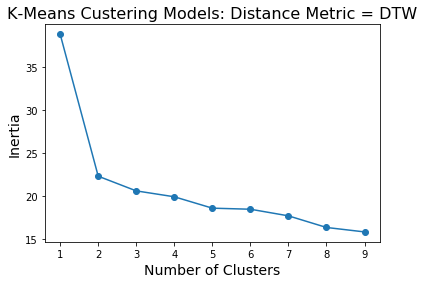

In [395]:
inertias = []                                                
for i in range(1,10):
    km = TimeSeriesKMeans(n_clusters=i,
                         metric='dtw',
                         random_state=666)
    km.fit(rho_df_train)
    inertias.append(km.inertia_)
plt.plot(range(1,10),inertias,marker='o')
plt.xlabel('Number of Clusters',size=14)
plt.ylabel('Inertia', size=14)
plt.title('K-Means Custering Models: Distance Metric = DTW',size=16)
#plt.savefig('../images/elbow_dtw.png')

;

**lets see if 2, 3, or 4 clusters looks better on a siluette plots**

In [27]:
from sklearn.metrics import  silhouette_samples

In [28]:
km2 = TimeSeriesKMeans(n_clusters=2,
                         metric='dtw')

In [39]:
km3 = TimeSeriesKMeans(n_clusters=3, metric="dtw")

In [46]:
km4 = TimeSeriesKMeans(n_clusters=4, metric="dtw") 

In [ ]:
km

In [29]:
y_km2 = km2.fit_predict(rho_df_train)

In [40]:
y_km3 = km3.fit_predict(rho_df_train)

In [47]:
y_km4 = km4.fit_predict(rho_df_train)

In [30]:
cluster_labels_2 = np.unique(y_km2)

In [40]:
cluster_labels_3 = np.unique(y_km3)

In [41]:
cluster_labels_4 = np.unique(y_km4)

In [31]:
from matplotlib import cm

In [32]:
from tslearn.clustering import silhouette_score

In [61]:
rho_df_train[0]

(206,)

In [71]:
y_km2

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [162]:
#silhouette_score(rho_df_train[0],y_km2[0],sample_size=1,metric='dtw')

In [33]:
#this is not correct way of doing this 
def sil_samples(fitted_model,X):
    d_matrix = fitted_model.transform(X)
    a = d_matrix[:,0] #intra cluster distance
    b = d_matrix[:,1]/(d_matrix.shape[1] - 1) #
    sil_samples = []
    for i in range(len(a)):
        sil_samples.append((b[i]-a[i])/max(b[i],a[i]))
    
    return sil_samples

In [66]:
from tslearn.metrics import dtw as DTW

In [74]:
def intra_cluster_dist(X,labels,metric,i):
    '''Calculate the mean intra-cluster distance for sample i.
     Returns
    -------
    a : float
        Mean intra-cluster distance for sample i
    '''
    indices = np.where(labels == labels[i])[0]
    
    if len(indices) == 0:
        return 0.
    a = np.mean([metric(X[i], X[j]) for j in indices if not i == j])
    return a

In [68]:
def nearest_cluster_distance(X,labels,metric,i):
    '''Calculate the mean nearest-cluster distance for sample i.'''
    '''    Returns
    -------
    b : float
        Mean nearest-cluster distance for sample i'''
    label = labels[i]
    b = np.min(
            [np.mean(
                [metric(X[i], X[j]) for j in np.where(labels == cur_label)[0]]
            ) for cur_label in set(labels) if not cur_label == label])
    return b

In [72]:
def sil_samples_2(X,labels,metric):
    '''Compute the Silhouette Coefficient for each sample.'''
    n = labels.shape[0]
    A = np.array([intra_cluster_dist(X, labels, metric, i)
                  for i in range(n)])
    B = np.array([nearest_cluster_distance(X, labels, metric, i)
                  for i in range(n)])
    sil_samples = (B - A) / np.maximum(A, B)
    # nan values are for clusters of size 1, and should be 0
    return np.nan_to_num(sil_samples)

In [75]:
km2_sil_samples = sil_samples_2(rho_df_train,y_km2,metric=DTW)

In [220]:
from itertools import compress
def make_sil_plot(x,y,metric,fitted_model):
    cluster_labels = np.unique(y)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = sil_samples_2(x,y,metric)
    y_ax_lower, y_ax_upper = 0,0
    yticks = []
    for i ,c in enumerate(cluster_labels):
        c_silhouette_vals = list(compress(silhouette_vals,y==c))

        c_silhouette_vals = sorted(c_silhouette_vals)
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i)/n_clusters)
        plt.barh(range(y_ax_lower,y_ax_upper),
                c_silhouette_vals,
                height=1.0,
                edgecolor='none',
                color=color)
        yticks.append((y_ax_lower + y_ax_upper)/2.)
        y_ax_lower += len(c_silhouette_vals)
    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg,
               color='red',
               linestyle='--')
    plt.yticks(yticks,cluster_labels +1)
    plt.ylabel('Cluster',size=14)
    plt.xlabel('Silhouette coefficient',size=14)
    plt.savefig('../images/sil_plot_c3.png')

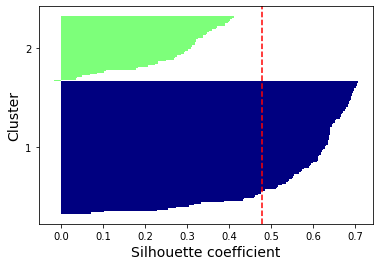

In [88]:
make_sil_plot(rho_df_train,y_km2,metric=DTW,fitted_model=km2)

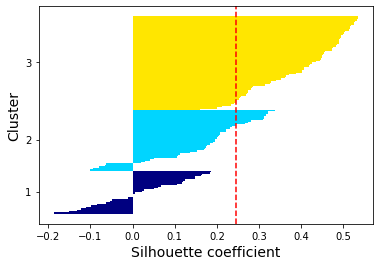

In [221]:
make_sil_plot(rho_df_train,y_km3,metric=DTW,fitted_model=km3)

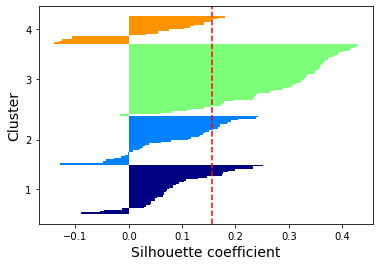

In [219]:
make_sil_plot(rho_df_train,y_km4,metric=DTW,fitted_model=km4)

In [44]:
km2.inertia_ #sum of distances of samples to there closest cluster center


22.045814924552687

In [94]:
true_labels = pd.DataFrame(train_df['activity'])

In [96]:
true_labels['km2_pred'] = y_km2

In [98]:
labels_df = true_labels

In [101]:
labels_df[labels_df['km2_pred']==0]

,activity,km2_pred
0,b'EPILEPSY',0
1,b'EPILEPSY',0
2,b'EPILEPSY',0
3,b'EPILEPSY',0
6,b'EPILEPSY',0
...,...,...
132,b'SAWING',0
133,b'SAWING',0
134,b'SAWING',0
135,b'SAWING',0


In [103]:
epilepsy = labels_df[labels_df['activity']==b'EPILEPSY']

**The silouete plot of two clusters looks the bast but we can asume there are more then 2 activities being performed. maybe seizure activity is so much different then the other activities the model naturaly groups it into seizure not seizure. Lets try and evaluate our model based on the true labels of epilepsy**

In [107]:
#ratio of true epilepy labels to each cluster
c0_ratio = epilepsy[epilepsy['km2_pred']==0].shape[0]/epilepsy.shape[0]

In [109]:
c1_ratio = epilepsy[epilepsy['km2_pred']==1].shape[0]/epilepsy.shape[0]

In [110]:
c1_ratio

0.2647058823529412

In [111]:
c0_ratio

0.7352941176470589

**It looks like there is a 70/20 split of cluster asignments to the epilepsy samples. I think this model is just not good**

**just for a visual i will plot the cluster centers against some of the samples**

In [115]:
labels_df['activity']==b'EPILEPSY'

0       True
1       True
2       True
3       True
4       True
       ...  
132    False
133    False
134    False
135    False
136    False
Name: activity, Length: 137, dtype: bool

In [118]:
epilepsy_samples = rho_df_train[labels_df['activity']==b'EPILEPSY']

''

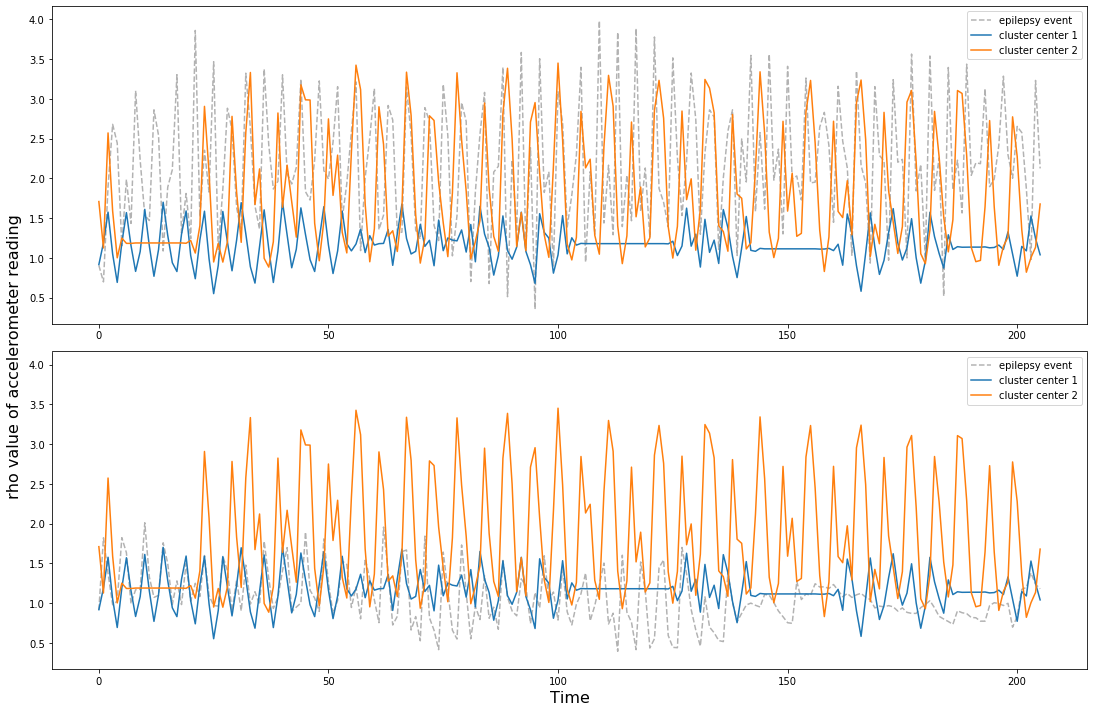

In [222]:
fig, axs = plt.subplots(2,1,figsize=(15,10),sharey=True)

axs[0].plot(epilepsy_samples[5],alpha=.3,color='k',linestyle='--',label='epilepsy event')
for i in range(2):
    axs[0].plot(km2.cluster_centers_[i],label=f'cluster center {i+1}')

axs[0].legend()

axs[1].plot(epilepsy_samples[1],alpha=.3,color='k',linestyle='--',label='epilepsy event')
for i in range(2):
    axs[1].plot(km2.cluster_centers_[i],label=f'cluster center {i+1}')  
    
fig.text(-0.01, 0.5, 'rho value of accelerometer reading', va='center', rotation='vertical',size=16)    
axs[1].set_xlabel('Time',size=16)
axs[1].legend()
plt.tight_layout()
plt.savefig('../images/raw_series_comparison.png')
;

**this visualization reveals that my model might cluster beter if i scale my data so that the model picks up on patern as apose to ampletude**

In [14]:
from tslearn.utils import to_time_series

In [213]:
rho_df_normalized = np.empty((0,206))
for row in rho_df_train:
    #print(rho_df_normalized.shape)
    #print(row.shape)
    row = np.reshape(row,(1,-1))
    #print(row.shape)
    #break
    #print(rho_df_normalized.shape)
    rho_df_normalized = np.append(rho_df_normalized,row/np.max(row),axis=0)
    #print(np.max(row))

In [215]:
rho_df_normalized

array([[0.25909437, 0.2441023 , 0.37051343, ..., 0.40431591, 0.46654983,
        0.59034825],
       [0.45457518, 0.90572451, 0.68290641, ..., 0.68563953, 0.61590673,
        0.58646698],
       [0.4932599 , 0.68783947, 0.72813125, ..., 0.56607538, 0.43831889,
        0.67147564],
       ...,
       [0.93437278, 0.65499712, 0.75971532, ..., 0.30583419, 0.5126117 ,
        0.29235783],
       [0.43797511, 0.21456904, 0.2539942 , ..., 0.456042  , 0.55746671,
        0.79706067],
       [0.81720573, 0.74584709, 0.38937484, ..., 0.35700568, 0.65188692,
        0.5312671 ]])

In [200]:
rho_df_train.shape

(137, 206)

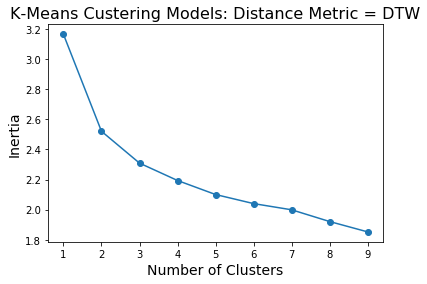

In [217]:
inertias = []                                                
for i in range(1,10):
    km = TimeSeriesKMeans(n_clusters=i,
                         metric='dtw',
                         random_state=666)
    km.fit(rho_df_normalized)
    inertias.append(km.inertia_)
plt.plot(range(1,10),inertias,marker='o')
plt.xlabel('Number of Clusters',size=14)
plt.ylabel('Inertia', size=14)
plt.title('K-Means Custering Models: Distance Metric = DTW',size=16)
#plt.savefig('../images/elbow_dtw_normalized.png')


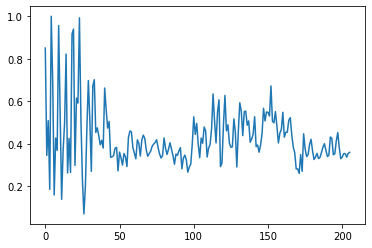

In [228]:
plt.plot(rho_df_normalized[labels_df['activity']==b'EPILEPSY'][3])

    Inertia: Intuitively, inertia tells how far away the points within a cluster are. Therefore, a small of inertia is aimed for. The range of inertia’s value starts from zero and goes up.
    Silhouette score: Silhouette score tells how far away the datapoints in one cluster are, from the datapoints in another cluster. The range of silhouette score is from -1 to 1. Score should be closer to 1 than -1.



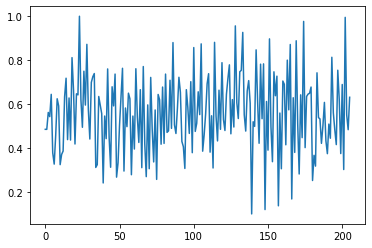

In [229]:
plt.plot(rho_df_normalized[labels_df['activity']==b'EPILEPSY'][10])

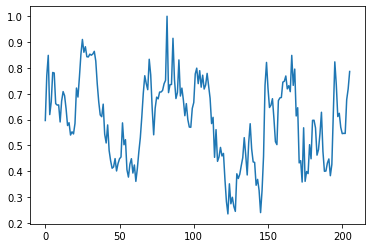

In [238]:
plt.plot(rho_df_normalized[labels_df['activity']==b'EPILEPSY'][6])

**lets try and do some feature extraction on the un normalized rho data instead**

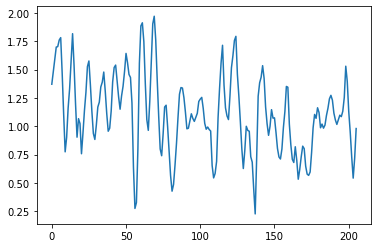

In [239]:
plt.plot(rho_df_train[labels_df['activity']==b'WALKING'][6])

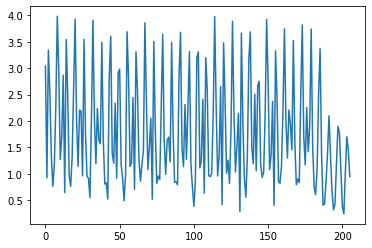

In [240]:
plt.plot(rho_df_train[labels_df['activity']==b'RUNNING'][6])

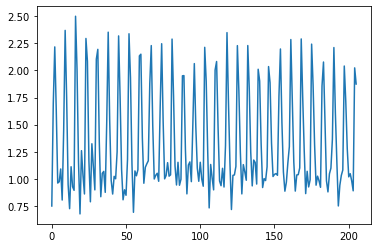

In [241]:
plt.plot(rho_df_train[labels_df['activity']==b'SAWING'][6])

FEATURE LIST:
average acceleration
mean accelration
variation or standard de=viation in accelration
velocity ( in windows of time? 
distance between mean and med
width between percentiles



The benefit of using CNNs for sequence classification is that they can learn from the raw time series data directly, and in turn do not require domain expertise to manually engineer input features.

TRansition to 1 d convolution nn to classify the 4 activities